In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
sal_data = pd.read_csv('/content/employee_data.csv')
sal_data.columns = ['Age', 'Gender', 'Degree', 'Job_Title', 'Experience_years', 'Salary']


In [67]:
print(sal_data.head())


    Age  Gender      Degree          Job_Title  Experience_years    Salary
0  32.0    Male  Bachelor's  Software Engineer               5.0   90000.0
1  28.0  Female    Master's       Data Analyst               3.0   65000.0
2  45.0    Male         PhD     Senior Manager              15.0  150000.0
3  36.0  Female  Bachelor's    Sales Associate               7.0   60000.0
4  52.0    Male    Master's           Director              20.0  200000.0


In [68]:
print(sal_data.dtypes)

Age                 float64
Gender               object
Degree               object
Job_Title            object
Experience_years    float64
Salary              float64
dtype: object


In [69]:
print(sal_data.info())
print(sal_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               373 non-null    float64
 1   Gender            373 non-null    object 
 2   Degree            373 non-null    object 
 3   Job_Title         373 non-null    object 
 4   Experience_years  373 non-null    float64
 5   Salary            373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None
(375, 6)


In [70]:
print(sal_data.columns)


Index(['Age', 'Gender', 'Degree', 'Job_Title', 'Experience_years', 'Salary'], dtype='object')


In [71]:
print(sal_data[sal_data.duplicated()])

      Age  Gender      Degree                              Job_Title  \
195  28.0    Male  Bachelor's                Junior Business Analyst   
250  30.0  Female  Bachelor's           Junior Marketing Coordinator   
251  38.0    Male    Master's                   Senior IT Consultant   
252  45.0  Female         PhD                Senior Product Designer   
253  28.0    Male  Bachelor's  Junior Business Development Associate   
254  35.0  Female  Bachelor's               Senior Marketing Analyst   
255  44.0    Male  Bachelor's               Senior Software Engineer   
256  34.0  Female    Master's               Senior Financial Advisor   
257  35.0    Male  Bachelor's             Senior Project Coordinator   
258  50.0  Female         PhD                 Director of Operations   
260   NaN     NaN         NaN                                    NaN   
262  46.0    Male         PhD                  Senior Data Scientist   
281  41.0  Female  Bachelor's             Senior Project Coordin

In [72]:
sal_data1 = sal_data.drop_duplicates(keep='first').copy()

In [73]:
print(sal_data1.isnull().sum())

Age                 1
Gender              1
Degree              1
Job_Title           1
Experience_years    1
Salary              1
dtype: int64


In [74]:
sal_data1.dropna(inplace=True)

In [75]:
print(sal_data1.shape)


(324, 6)


In [76]:
print(sal_data1.describe())

              Age  Experience_years         Salary
count  324.000000        324.000000     324.000000
mean    37.382716         10.058642   99985.648148
std      7.185844          6.650470   48652.271440
min     23.000000          0.000000     350.000000
25%     31.000000          4.000000   55000.000000
50%     36.500000          9.000000   95000.000000
75%     44.000000         16.000000  140000.000000
max     53.000000         25.000000  250000.000000


In [77]:
corr = sal_data1[['Age', 'Experience_years', 'Salary']].corr()
print(corr)

                       Age  Experience_years    Salary
Age               1.000000          0.979192  0.916543
Experience_years  0.979192          1.000000  0.924455
Salary            0.916543          0.924455  1.000000


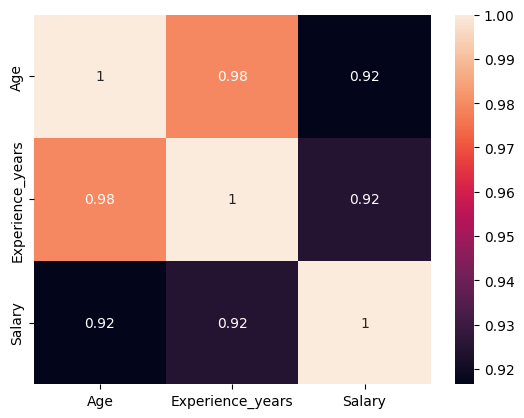

In [78]:
sns.heatmap(corr, annot=True)
plt.show()

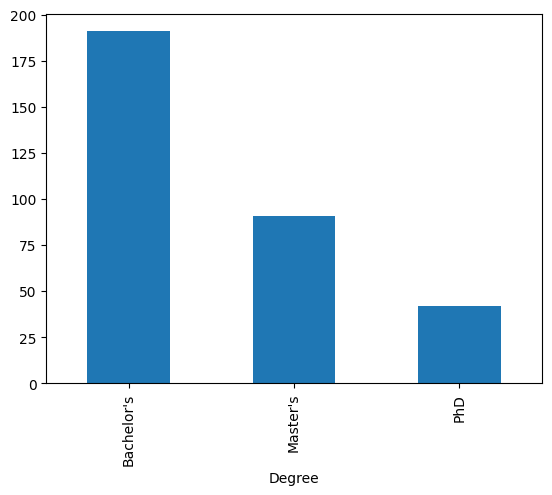

In [79]:
sal_data1['Degree'].value_counts().plot(kind='bar')
plt.show()

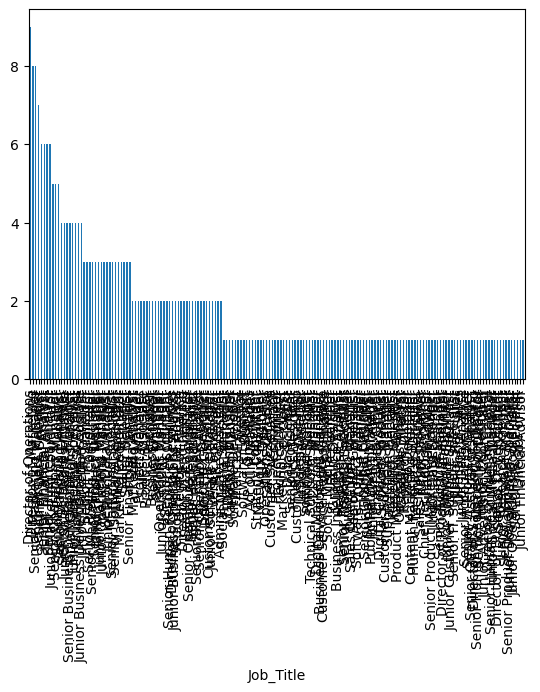

In [80]:
sal_data1['Job_Title'].value_counts().plot(kind='bar')
plt.show()

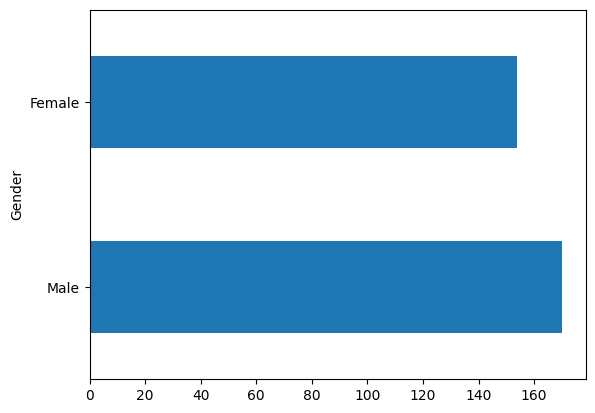

In [81]:
sal_data1['Gender'].value_counts().plot(kind='barh')
plt.show()

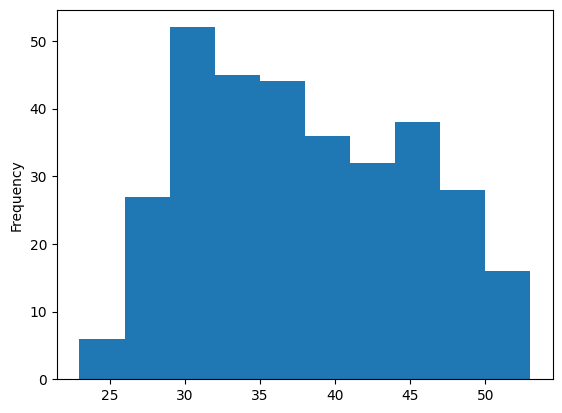

In [82]:
sal_data1['Age'].plot(kind='hist')
plt.show()

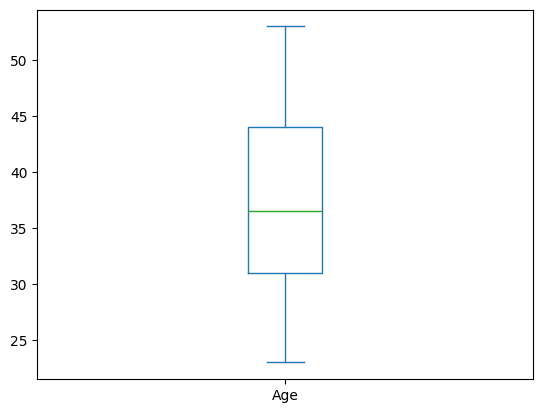

In [83]:
sal_data1['Age'].plot(kind='box')
plt.show()

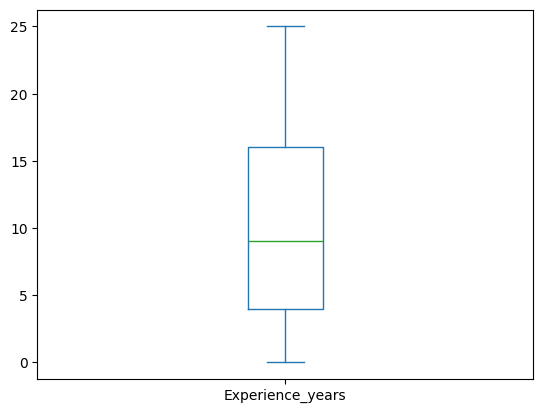

In [84]:
sal_data1['Experience_years'].plot(kind='box')
plt.show()

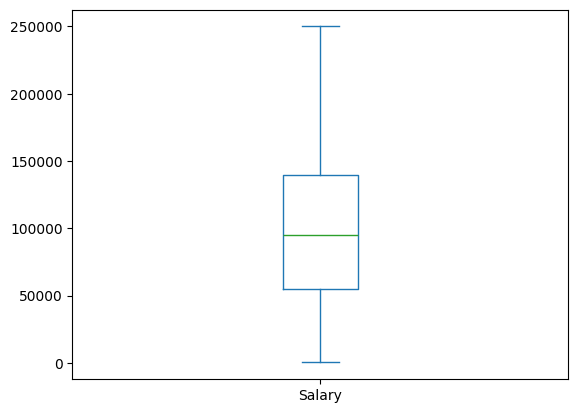

In [85]:

sal_data1['Salary'].plot(kind='box')
plt.show()

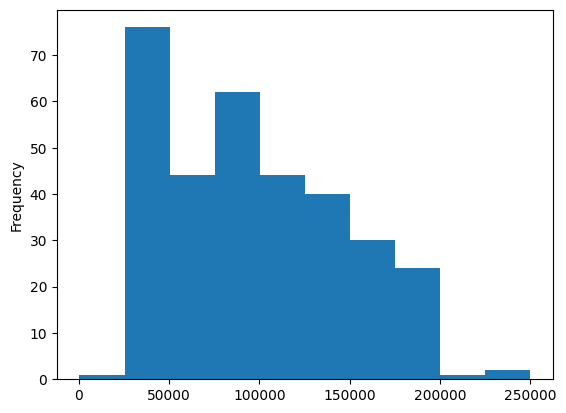

In [86]:

sal_data1['Salary'].plot(kind='hist')
plt.show()

In [87]:
from sklearn.preprocessing import LabelEncoder

Label_Encoder = LabelEncoder()

sal_data1['Gender_Encode'] = Label_Encoder.fit_transform(sal_data1['Gender'])
sal_data1['Degree_Encode'] = Label_Encoder.fit_transform(sal_data1['Degree'])
sal_data1['Job_Title_Encode'] = Label_Encoder.fit_transform(sal_data1['Job_Title'])

In [88]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

sal_data1['Age_scaled'] = std_scaler.fit_transform(sal_data1[['Age']])
sal_data1['Experience_years_scaled'] = std_scaler.fit_transform(sal_data1[['Experience_years']])

In [89]:
x = sal_data1[['Age_scaled', 'Gender_Encode', 'Degree_Encode', 'Job_Title_Encode', 'Experience_years_scaled']]
y = sal_data1['Salary']

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [91]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [92]:
y_pred_rf = rf_model.predict(x_test)


In [93]:
df = pd.DataFrame({'y_Actual': y_test, 'y_Predicted': y_pred_rf})
df['Error'] = df['y_Actual'] - df['y_Predicted']
df['abs_error'] = abs(df['Error'])


In [94]:
Mean_absolute_Error = df['abs_error'].mean()
print("Mean Absolute Error =", round(Mean_absolute_Error, 2))

Mean Absolute Error = 9371.85


In [95]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print(f"Accuracy of the model = {round(r2_score(y_test, y_pred_rf), 4) * 100} %")
print(f"Mean Absolute Error = {round(mean_absolute_error(y_test, y_pred_rf), 2)}")
mse = round(mean_squared_error(y_test, y_pred_rf), 2)
print(f"Mean Squared Error = {mse}")
print("Root Mean Squared Error (RMSE) =", round(mse ** 0.5, 2))

Accuracy of the model = 91.41 %
Mean Absolute Error = 9371.85
Mean Squared Error = 162409717.48
Root Mean Squared Error (RMSE) = 12744.01


In [96]:
importances = rf_model.feature_importances_
features = x.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)


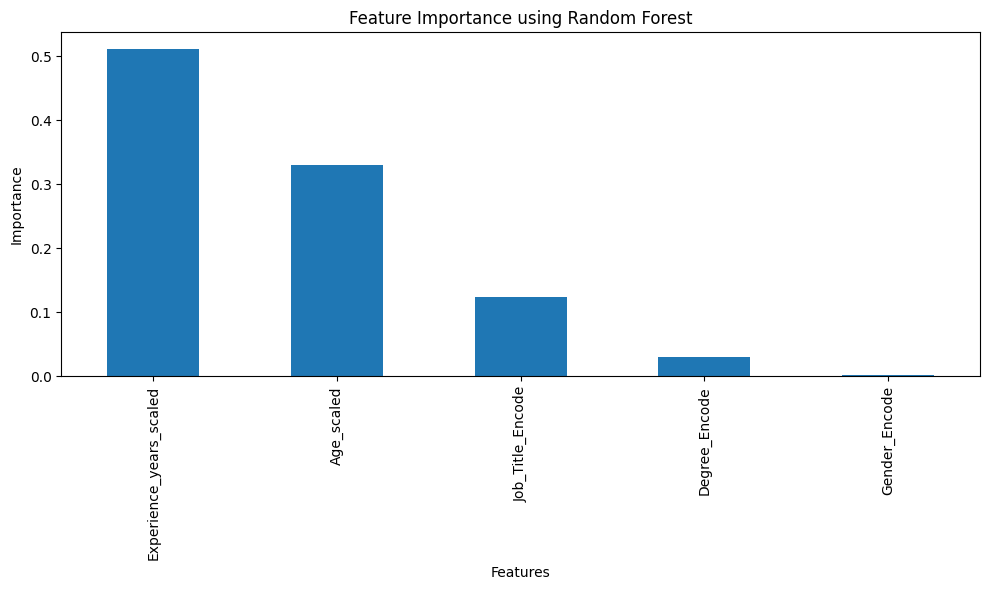

In [97]:
plt.figure(figsize=(10, 6))
feat_importance.plot(kind='bar')
plt.title('Feature Importance using Random Forest')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [98]:
 # Create a DataFrame with the correct feature names for prediction
prediction_data = pd.DataFrame([[Age1, Gender, Degree, Job_Title, Experience_years1]], columns=x.columns)

Emp_Salary = rf_model.predict(prediction_data)
print("Salary of that Employee with above Attributes =", Emp_Salary[0])

Salary of that Employee with above Attributes = 171100.0


In [99]:
Age1 = std_scaler.transform([[49]])[0][0]
Experience_years1 = std_scaler.transform([[15]])[0][0]
Gender = 0
Degree = 2
Job_Title = 22

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [100]:
Emp_Salary = rf_model.predict([[Age1, Gender, Degree, Job_Title, Experience_years1]])
print("Salary of that Employee with above Attributes =", Emp_Salary[0])

Salary of that Employee with above Attributes = 171100.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [101]:
import shap

In [102]:
shap.initjs()

In [103]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(x_train)

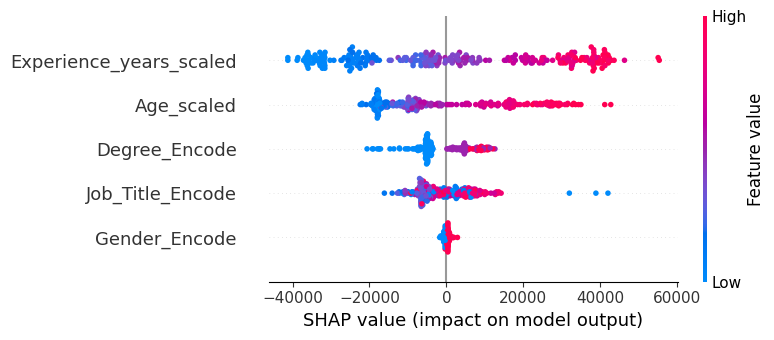

In [104]:
shap.summary_plot(shap_values, x_train, feature_names=x.columns.tolist())


In [105]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

sal_data1['Age_scaled'] = std_scaler.fit_transform(sal_data1[['Age']])
sal_data1['Experience_years_scaled'] = std_scaler.fit_transform(sal_data1[['Experience_years']])

In [106]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [107]:
Age1 = std_scaler.transform([[49]])[0][0]
Experience_years1 = std_scaler.transform([[15]])[0][0]
Gender = 0
Degree = 2
Job_Title = 22

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [109]:
Emp_Salary = rf_model.predict([[Age1, Gender, Degree, Job_Title, Experience_years1]])
print("Salary of that Employee with above Attributes =", Emp_Salary[0])

Salary of that Employee with above Attributes = 171100.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
